# 3. Bag of Words - BOW
#### Bag of Words 모델은 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델이다.
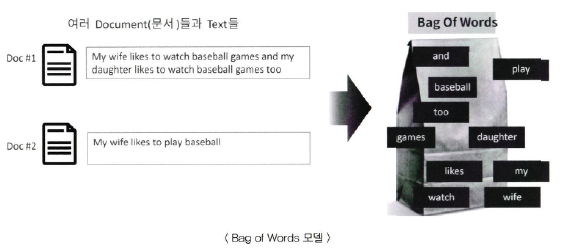

#### 아래와 같이 2개의 문장이 있다고 가정했을 때, 해당 문장을 BOW의 단어 수(Word Count) 기반으로 피처를 추출해보자
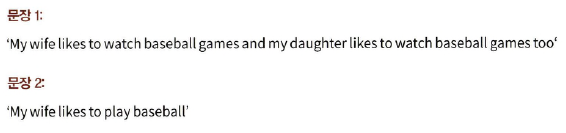
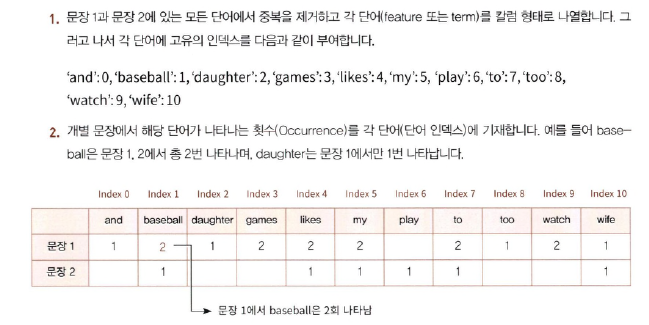

#### BOW 모델은 장점은 쉽고 빠른 구축이다. 단순히 단어의 발생 횟수에 기반하고 있지만, 생각보다 문서의 특성을 잘 살린다.
#### 하지만, BOW 기반의 NLP 연구에서 여러 가지 제약이 있는데, 대표적인 단점은 아래와 같다.
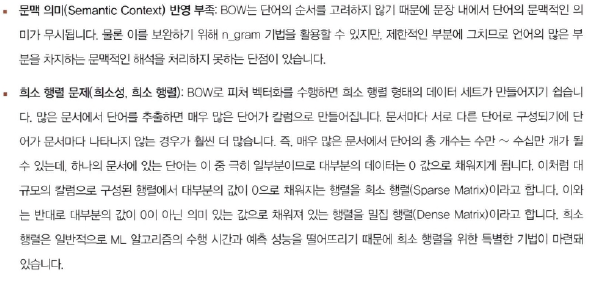

## BOW 피처 벡터화
#### 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환해야 하는데, 이러한 변환을 피처 벡터화라고 한다.
#### 예를 들어, 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 해당 피처의 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터를 만드는 기법이다.
#### BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것이다.
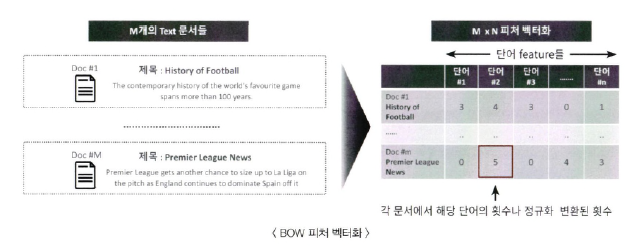

#### 일반적으로 BOW의 피처 벡터화는 아래와 같이 두 가지 방식이 있다.
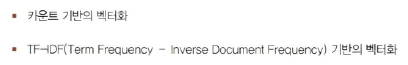

#### 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타는 횟수, 즉 Count를 부여하는 경우를 카운터 벡터화라고 한다.
#### 카운터 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식된다.
#### 하지만, 카운트만 부여할 경우 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 받을 수도 있다. 그래서 TF-IDF 벡터화를 사용한다.
#### TF-IDF는 개별 문서에서 자주 나타나는 단어에는 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식이다.
#### 모든 문서에서 반복적으로 자주 발생하는 단어에 대해서 패널티를 부여하여 단어에 대한 가중치의 균형을 맞추는 것이다.
#### 이러하여 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능을 보장할 수 있다
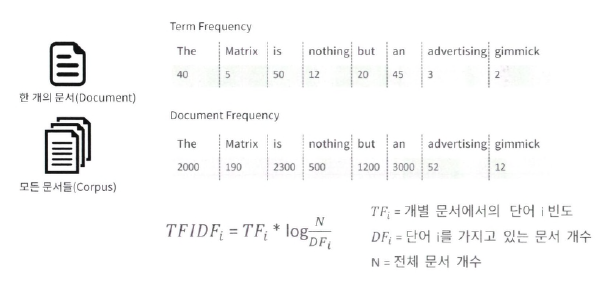

## 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer
#### 사이킷런의 CountVectorizer 클래스는 카운트 기반의 벡터화를 구현한 클래스이다. 단순 피처 벡터화만 수행하지 않고, 토큰화/stopwords/필터링 등의 텍스트 전처리도 같이 수행한다.
#### 사이킷런의 다른 피처 변환 클래스와 마찬가지로 fit()과 transform()을 통해 피처 벡터화된 객체를 반환한다.
#### 아래에 CountVectorizer의 입력 파라미터를 소개한다.
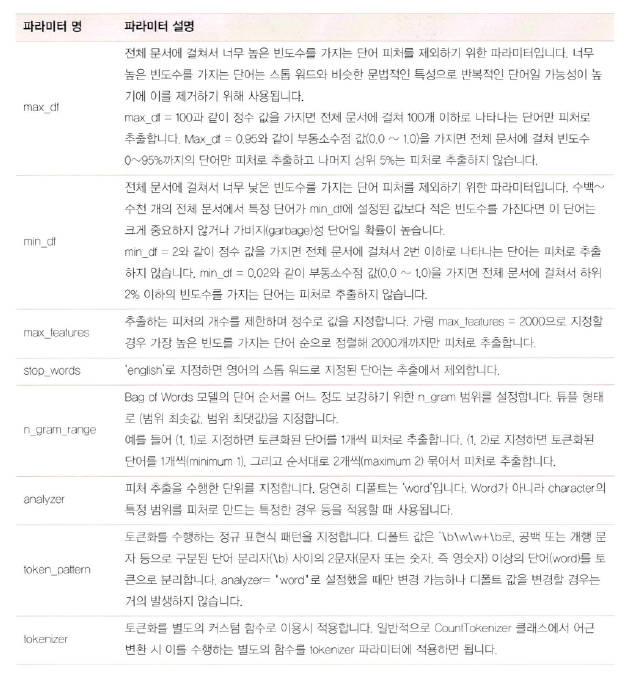

#### CountVectorizer를 이용한 피처 벡터화 방법은 아래와 같다.
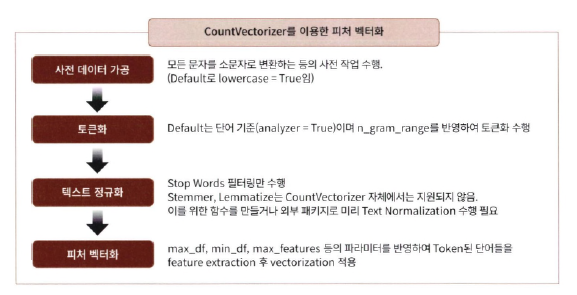

#### TF-IDF 벡터화는 TfidfVectorizer 클래스를 이용하고, 파라미터 변환 방법은 CountVectorizer와 동일하다

## BOW 벡터화를 위한 희소 행렬
#### 사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환한다.
#### 좀 더 난이도 있는 ML 모델을 수립하기 위해서 희소 행렬의 구조에 대해서 알아볼 것이다.
#### 모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼을 만들 수 밖에 없다.
#### 이러한 대규모 행렬이 생성되더라도 레코드의 각 문서가 가지는 단어의 수는 제한적이기 때문에 이 행렬의 값은 대부분 0이 차지할 수 밖에 없다. 이처럼 대규모 행렬에 대부분의 값이 0을 차지하는 행렬을 희소 행렬이라고 한다.
#### BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬이다.
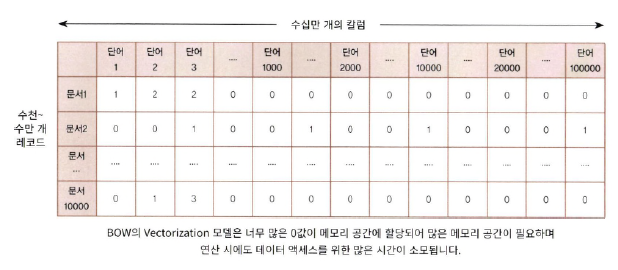

#### 희소 행렬은 불필요한 메모리 공간이 많이 필요하고, 연산 시 데이터 엑세스 시간도 많이 소모된다. 
#### 그래서, 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, 대표적인 방법은 COO 형식과 CSR 형식이 있다.
#### 일반적으로 CSR 형식을 많이 사용한다. 먼저, COO 형식부터 설명한다.

## 희소 행렬 - COO 형식
#### COO(Coordinate: 좌표) 형식은 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식이다.
#### 예를 들어, [[3,0,1],[0,2,0]] 일 때 0이 아닌 데이터는 [3,1,2]이고, 데이터가 있는 위치를 표시하면 (0,0), (0,2), (1,1)가 되고, 별도의 배열로 저장하면 로우는 [0, 0, 1], 칼럼은 [0, 2, 1]이다.
#### 파이썬에서는 희소 행렬 변환을 위해 사이파이를 이용한다.

In [1]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

from scipy import sparse

data = np.array([3,1,2])

row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [3]:
sparse_coo

<2x3 sparse matrix of type '<class 'numpy.int32'>'
	with 3 stored elements in COOrdinate format>

#### sparse_coo는 COO 형식의 희소 행렬 객체 변수이다. toarray()를 이용해 다시 밀집 형태의 행렬로 출력해보자

In [2]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

## 희소 행렬 - CSR 형식
#### CSR 형식은 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 데이터를 사용해야 하는 문제점을 해결한 방식이다.
#### 먼저 COO 형식의 문제점을 살펴보자. 아래와 같은 2차원 배열이 있다고 가정하고 COO 형식으로 변환한다.

In [4]:
[[ 0, 0, 1, 0, 0, 5], [1, 4, 0, 3, 2, 5], [0, 6, 0, 3, 0, 0], [2, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 8], [1, 0 ,0, 0, 0, 0]]

[[0, 0, 1, 0, 0, 5],
 [1, 4, 0, 3, 2, 5],
 [0, 6, 0, 3, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [0, 0, 0, 7, 0, 8],
 [1, 0, 0, 0, 0, 0]]

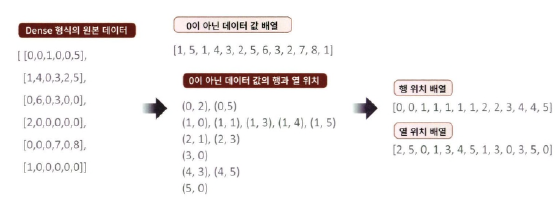

#### 행 위치 배열을 보면 순차적인 같은 값이 반복적으로 나타난다. 즉, 0이 2번, 1이 5번 반복된다. 행 위치 배열이 0부터 순차적으로 증가하는 값으로 이뤄졌다는 특성을 고려하면 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 이런 반복을 제거할 수 있다.
#### 해당 방식은 CSR, 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식이다.
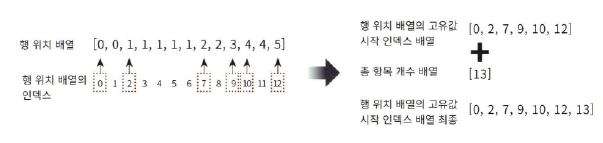

#### CSR 방식의 변환은 사이파이의 csr_matrix 클래스를 이용해 쉽게 구현할 수 있다.

In [5]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [6]:
print(sparse_csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [7]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [8]:
coo

<6x6 sparse matrix of type '<class 'numpy.int32'>'
	with 13 stored elements in COOrdinate format>

In [9]:
csr

<6x6 sparse matrix of type '<class 'numpy.intc'>'
	with 13 stored elements in Compressed Sparse Row format>

#### 실제 사용시에는 위와 같이 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성할 수 있다.